# Sklearn Example

> Kagle: What is a note?

> https://www.kaggle.com/juliancienfuegos/what-is-a-note

> Autocorrelation_Note by https://www.kaggle.com/asparago/simple-pitch-detector

In [24]:
from os import listdir
from os.path import isfile, join
from scipy.io import wavfile
import os

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
#Load the list of wav files
path='./data/GuitarNotes/GuitarNotes'
files = [f for f in os.listdir(path) if f.endswith('.wav')]
files.sort()

In [111]:
#We also define a dataframe containing the filenames, we will use this later
dfa = pd.read_csv("data/WavFileNoteLabel.csv",index_col=1)
dfa.drop("Unnamed: 0",axis = 1,inplace=True)
dfa.head()

,Autocorrelation_Not
File,
(Scale1) Do.wav,A2
(Scale2) Re.wav,B2
(Scale3) Mi.wav,C3
(Scale4) Fa.wav,D3
(Scale5) So.wav,E3


In [96]:
Xfile = [wavfile.read(path + "/" + file_)[1] for file_ in files ]

In [102]:
# record from max
Xfile = [row[np.argmax(row):np.argmax(row)+80000] for row in Xfile]

In [105]:
Xfile_df = pd.DataFrame(Xfile, index = files)

In [113]:
data = pd.concat([dfa,Xfile_df],axis = 1)

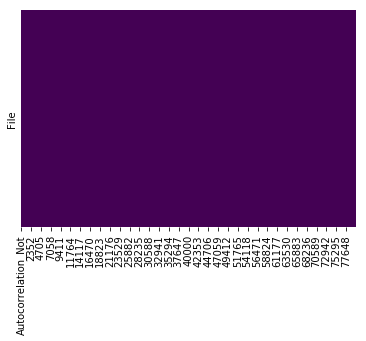

In [147]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap='viridis')

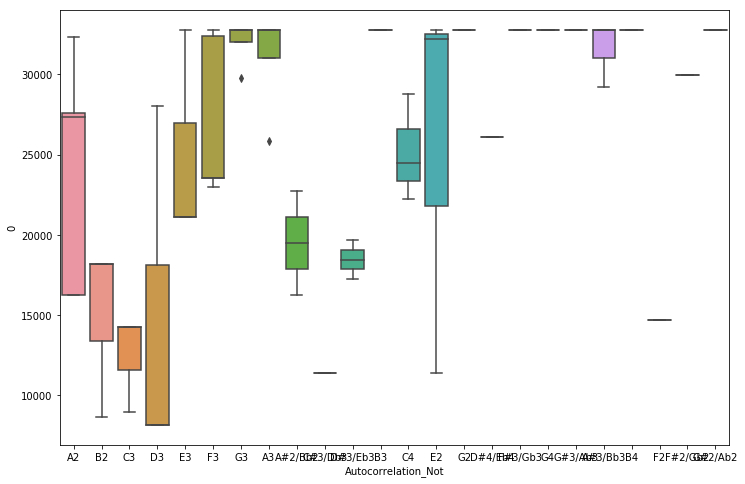

In [151]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Autocorrelation_Not',y=0 ,data=data);

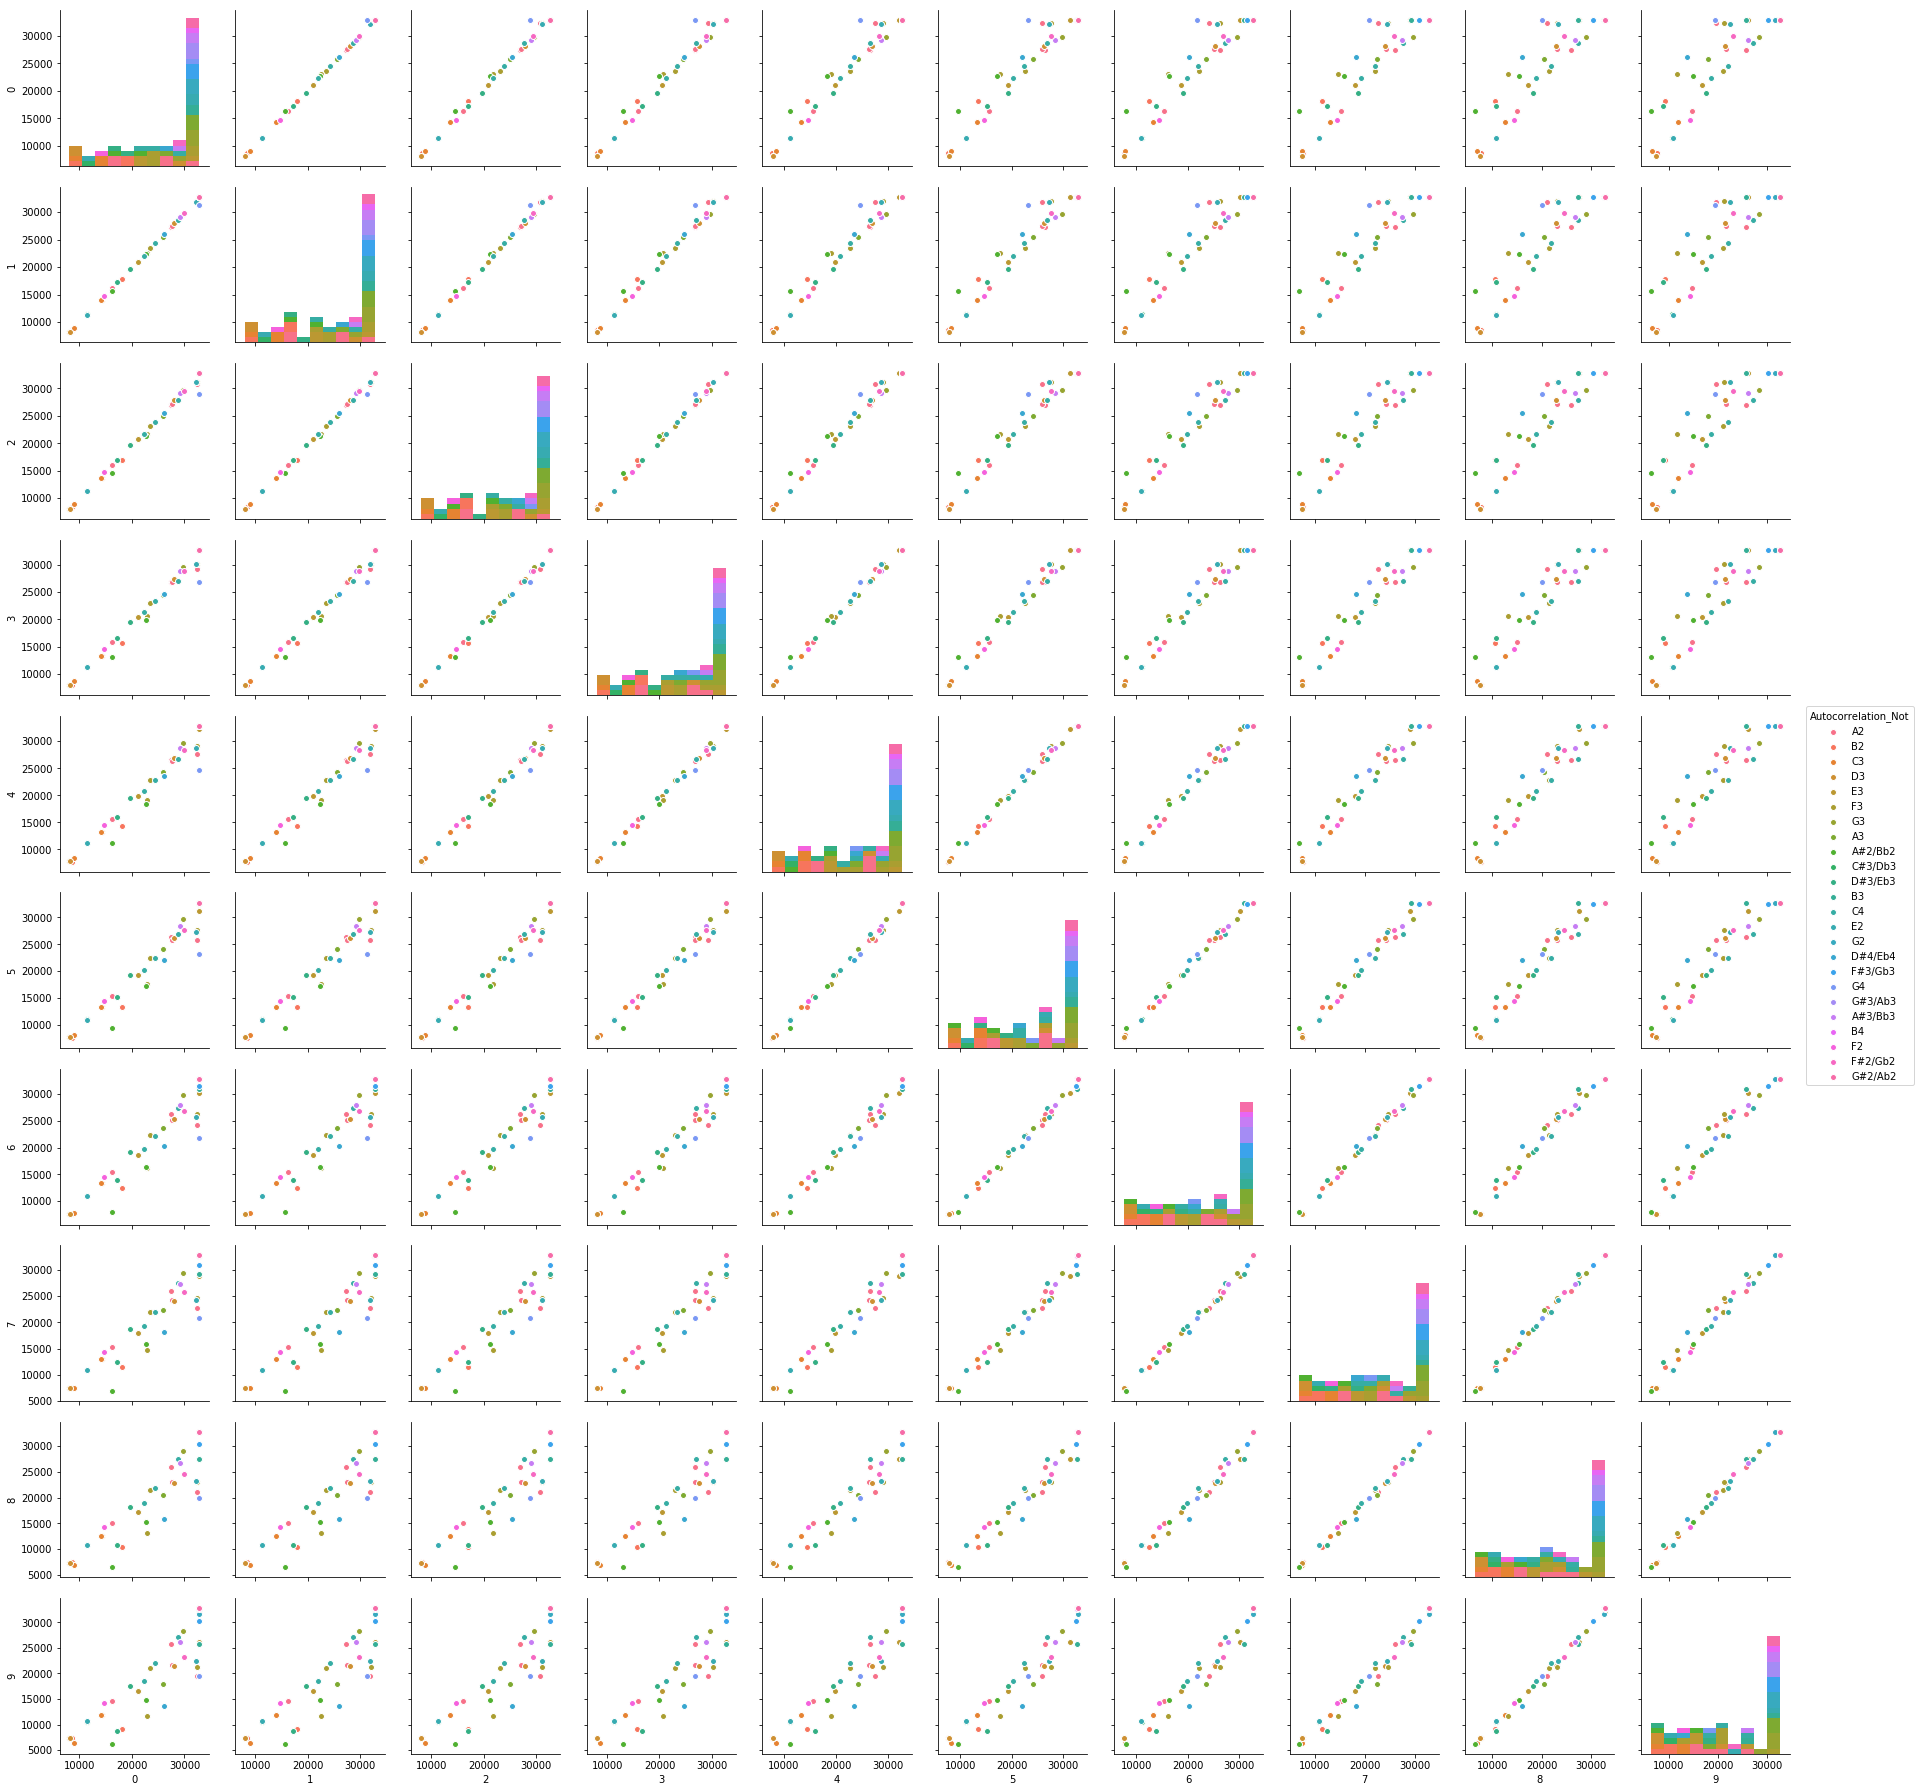

In [169]:
sns.pairplot(data[range(0,10) + ["Autocorrelation_Not"]], hue ="Autocorrelation_Not")

## Train Test Split

In [170]:
from sklearn.cross_validation import train_test_split

In [196]:
X = data.drop("Autocorrelation_Not", axis = 1)
y = data.Autocorrelation_Not
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Decision Trees Train/ Predict/ Evalulate

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
dtree = DecisionTreeClassifier()

In [199]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [200]:
pred = dtree.predict(X_test)

In [201]:
from sklearn.metrics import confusion_matrix, classification_report

In [202]:
print confusion_matrix(y_test,pred)
print "\n"
print classification_report(y_test,pred)

[[1 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


             precision    recall  f1-score   support

         A3       1.00      0.50      0.67         2
         C4       0.00      0.00      0.00         1
         D3       1.00      1.00      1.00         1
    G#2/Ab2       0.00      0.00      0.00         0
         G2       0.00      0.00      0.00         0

avg / total       0.75      0.50      0.58         4



## Random Forest Train/ Predict/ Evalulate

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
rf = RandomForestClassifier(n_estimators=100) # number of tree

In [220]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [221]:
rf_pred = rf.predict(X_test)

In [222]:
print confusion_matrix(y_test,rf_pred)
print "\n"
print classification_report(y_test,rf_pred)

[[1 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 0]]


             precision    recall  f1-score   support

         A3       1.00      0.50      0.67         2
         C4       1.00      1.00      1.00         1
         D3       1.00      1.00      1.00         1
         G2       0.00      0.00      0.00         0

avg / total       1.00      0.75      0.83         4



In [223]:
data.Autocorrelation_Not.value_counts()

A2         5
F3         5
G3         4
A3         4
C4         3
G2         3
A#3/Bb3    3
G#3/Ab3    3
E2         3
E3         3
F#3/Gb3    3
B2         3
C3         3
D3         3
B3         2
G#2/Ab2    2
A#2/Bb2    2
D#3/Eb3    2
F#2/Gb2    1
D#4/Eb4    1
C#3/Db3    1
B4         1
G4         1
F2         1
Name: Autocorrelation_Not, dtype: int64

## Tree Visulization

> https://www.graphviz.org

In [227]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 